# The influence of population growth on the forest size and individual income between 1990 and 2015 in Brazil and China.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
There are clues indicating to relationship between increasing population and negatively affects on income level per individual and the forest area. This data is analysied to show to what extent that this relation is ture. Selected countries, China and Brazil, have economic boom last 5 decades. The project is going to examine the population growth rate  and forest area data as well as seeking the relation between them. Also, the project examises the impact of population rate on an individaul income rate of the selected countries. 

## The aim of project is to answer that
### 1. what is the relation between population growth rate and forest area in Brazil and China?  
### 2. what is the relation between population growth rate and individual income in Brazil and China? 

<a id='wrangling'></a>
## Data wrangling

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [3]:
#Loading the files 
pop= pd.read_csv('population_total.csv')
i= pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
f= pd.read_csv('forest_area_sq_km.csv')

In [4]:
# To check up data 
def discover(x):
    print('General info :')
    print(x.info())
    print('How many duplications?')
    print(x.duplicated().sum())
    print('Any Null?')
    print(x.isnull().sum().any())

In [5]:
#Check the existing of data 
def index(data,c1,c2,start,end): 
    print(f'The index of '+c1+' is ')
    print(data[data.country == c1].iloc[:, range(0).count])
    print(f'The index of '+ c2 +' is ')
    print(data[data.country == c2].iloc[:, range(0).count])    
    print(f'The index of '+start +' is')
    print(data.columns.get_loc(start))
    print(f'The index of '+end +' is ')
    print(data.columns.get_loc(end))

<a id='wrangling'></a>
## Clean  population Data 

In [6]:
discover(pop) #to get general information about population data

General info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: int64(301), object(1)
memory usage: 460.2+ KB
None
How many duplications?
0
Any Null?
False


In [7]:
index(pop,'Brazil','China','1990','2015') # to check existing of requirement in the data

The index of Brazil is 
23    Brazil
Name: country, dtype: object
The index of China is 
35    China
Name: country, dtype: object
The index of 1990 is
191
The index of 2015 is 
216


In [8]:
#build new data frame
Selected= ['Brazil','China']
df = pop[pop['country'].isin(Selected)] 
fr1= df.iloc[:, [0]] 
fr2= df.iloc[:, 191:217] 
popfr = fr1.join([fr2], how='inner', on=None)

In [9]:
#arrangment table 
popfr1= popfr.transpose()
popfr1.columns= ['Brazil','China']
pop_frame= popfr1.drop(['country'])

<a id='wrangling'></a>
## Clean Forest Data 

In [10]:
discover(f)#to get general information about Forest data

General info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
country    193 non-null object
1990       190 non-null float64
1991       190 non-null float64
1992       190 non-null float64
1993       191 non-null float64
1994       191 non-null float64
1995       191 non-null float64
1996       191 non-null float64
1997       191 non-null float64
1998       191 non-null float64
1999       191 non-null float64
2000       191 non-null float64
2001       191 non-null float64
2002       191 non-null float64
2003       191 non-null float64
2004       191 non-null float64
2005       191 non-null float64
2006       191 non-null float64
2007       191 non-null float64
2008       191 non-null float64
2009       191 non-null float64
2010       191 non-null float64
2011       193 non-null float64
2012       193 non-null float64
2013       193 non-null float64
2014       193 non-null float64
2015       193 non-null float64
2016       193 no

In [11]:
np.where(pd.isnull(f)) #where is the null

(array([ 56,  56,  56, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157,
        157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 163, 163,
        163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163,
        163, 163, 163, 163, 163, 163], dtype=int64),
 array([ 1,  2,  3,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
        15, 16, 17, 18, 19, 20, 21,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
        11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], dtype=int64))

In [12]:
f.fillna(f.mean()) #refill null cell 

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,1.350000e+04,13500.00,1.350000e+04,1.350000e+04,1.350000e+04,1.350000e+04,1.350000e+04,1.350000e+04,1.350000e+04,...,1.350000e+04,1.350000e+04,1.350000e+04,1.350000e+04,13500.0,13500.0,13500.0,13500.0,13500.0,13500.0
1,Albania,7.890000e+03,7870.00,7.850000e+03,7.830000e+03,7.810000e+03,7.790000e+03,7.770000e+03,7.750000e+03,7.730000e+03,...,7.800000e+03,7.790000e+03,7.780000e+03,7.760000e+03,7750.0,7740.0,7730.0,7720.0,7720.0,7710.0
2,Algeria,1.670000e+04,16600.00,1.650000e+04,1.640000e+04,1.630000e+04,1.620000e+04,1.610000e+04,1.610000e+04,1.600000e+04,...,1.690000e+04,1.770000e+04,1.840000e+04,1.920000e+04,19300.0,19300.0,19400.0,19500.0,19600.0,19600.0
3,Andorra,1.600000e+02,160.00,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,...,1.600000e+02,1.600000e+02,1.600000e+02,1.600000e+02,160.0,160.0,160.0,160.0,160.0,160.0
4,Angola,6.100000e+05,609000.00,6.070000e+05,6.060000e+05,6.050000e+05,6.040000e+05,6.020000e+05,6.010000e+05,6.000000e+05,...,5.890000e+05,5.870000e+05,5.860000e+05,5.850000e+05,584000.0,582000.0,581000.0,580000.0,579000.0,577000.0
5,Antigua and Barbuda,1.030000e+02,103.00,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.010000e+02,1.010000e+02,1.010000e+02,...,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,98.0,98.0,98.0,98.0,98.0,98.0
6,Argentina,3.480000e+05,345000.00,3.420000e+05,3.390000e+05,3.360000e+05,3.330000e+05,3.300000e+05,3.270000e+05,3.240000e+05,...,2.960000e+05,2.920000e+05,2.890000e+05,2.860000e+05,283000.0,280000.0,277000.0,274000.0,271000.0,268000.0
7,Armenia,3.350000e+03,3350.00,3.350000e+03,3.340000e+03,3.340000e+03,3.340000e+03,3.340000e+03,3.340000e+03,3.330000e+03,...,3.320000e+03,3.310000e+03,3.310000e+03,3.310000e+03,3310.0,3310.0,3320.0,3320.0,3320.0,3320.0
8,Australia,1.290000e+06,1290000.00,1.290000e+06,1.290000e+06,1.290000e+06,1.290000e+06,1.290000e+06,1.290000e+06,1.290000e+06,...,1.260000e+06,1.250000e+06,1.240000e+06,1.230000e+06,1240000.0,1240000.0,1240000.0,1240000.0,1250000.0,1250000.0
9,Austria,3.780000e+04,37800.00,3.790000e+04,3.790000e+04,3.800000e+04,3.810000e+04,3.810000e+04,3.820000e+04,3.830000e+04,...,3.850000e+04,3.860000e+04,3.860000e+04,3.860000e+04,38600.0,38600.0,38700.0,38700.0,38700.0,38700.0


In [13]:
f.shape # check refill step

(193, 28)

In [14]:
index(f,'Brazil','China','1990','2015') # to check existing of requirement in the data

The index of Brazil is 
23    Brazil
Name: country, dtype: object
The index of China is 
35    China
Name: country, dtype: object
The index of 1990 is
1
The index of 2015 is 
26


In [15]:
#build new data frame
Selected= ['Brazil','China']
df = f[f['country'].isin(Selected)] 
ffr= df.iloc[:, 0:27]

In [16]:
#arrangment table 
ffr1= ffr.transpose()
ffr1.columns= ['Brazil','China']
forest_frame= ffr1.drop(['country'])

<a id='wrangling'></a>
## Clean Income Data 

In [17]:
discover(i) #to get general information about income data

General info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 242 entries, country to 2040
dtypes: int64(241), object(1)
memory usage: 365.0+ KB
None
How many duplications?
0
Any Null?
False


In [18]:
index(i,'Brazil','China','1990','2015') # to check existing of requirement in the data

The index of Brazil is 
23    Brazil
Name: country, dtype: object
The index of China is 
35    China
Name: country, dtype: object
The index of 1990 is
191
The index of 2015 is 
216


In [19]:
#build new data frame
Selected= ['Brazil','China']
df = i[i['country'].isin(Selected)] 
fr1= df.iloc[:, [0]] 
fr2= df.iloc[:, 191:217] 
ifr = fr1.join([fr2], how='inner', on=None)

In [20]:
#arrangment table 
ifr1= ifr.transpose()
ifr1.columns= ['Brazil','China']
income_frame= ifr1.drop(['country'])

### The data is loaded and adjusted to be ready for next step. 
1. Obtaing generel iformation about the data and is there and duplication or null cells.
2. cleaing data and refill null cells by mean
3. Forming a new table to draw the graph 


<a id='eda'></a>
## Exploratory Data Analysis

### To show population growth rate in both countries during the period.

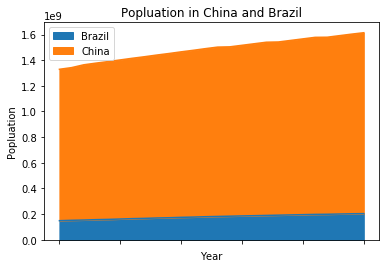

In [21]:
#Popluation
p= pop_frame.plot(kind='area');
p.set_xlabel('Year');
p.set_ylabel('Popluation');
p.set_title('Popluation in China and Brazil');
#china are much groth per year in population

### To show altering a forest area in both countries during the period.

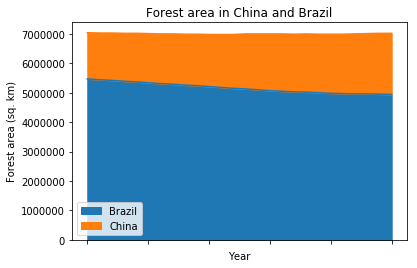

In [22]:
#Forest area (sq. km)
f= forest_frame.plot(kind='area');
f.set_ylabel('Forest area (sq. km)');
f.set_xlabel('Year');
f.set_title('Forest area in China and Brazil');
#china show having an altering a forest area per year than brazil

### To show the change in an individual income in both countries during the period. 

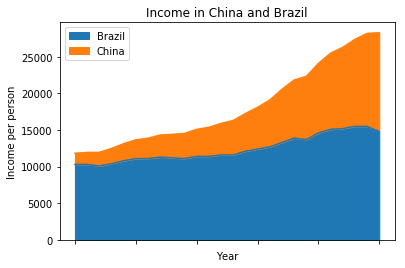

In [23]:
#Income per person (GDP/capita, PPP$ inflation-adjusted)
i= income_frame.plot(kind='area');
i.set_xlabel('Year');
i.set_ylabel('Income per person');
i.set_title('Income in China and Brazil');
#china has much individual income than brazil which make it more attractive to go to and that make the population groth more

## What is the relationship between population growth rate and forest area? 

### To examine the correlation between population and Forest area in China

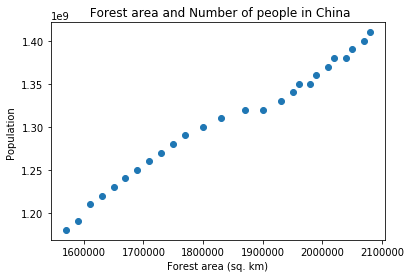

In [24]:
x= forest_frame.China 
y= pop_frame.China
plt.scatter(x, y);
plt.xlabel('Forest area (sq. km)');
plt.ylabel('Population ');
plt.title(' Forest area and Number of people in China');
# they have a Positive relationship them that makes us knew that , the more population groth the more the forest area exsist

### To examine correlation between population and Forest area in Brazil

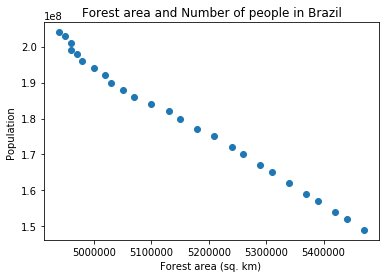

In [25]:
x= forest_frame.Brazil 
y= pop_frame.Brazil
plt.scatter(x, y);
plt.xlabel('Forest area (sq. km) ');
plt.ylabel('Population ');
plt.title('Forest area and Number of people in Brazil');
#negative correlation between population and Forest area in brazil ,the less population groth the less the forest area exsist

## What is the relationship between population growth rate and individual income rate? 

### To check up the correlation between population and Income per person in China

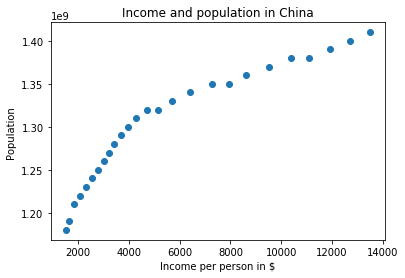

In [26]:
x= income_frame.China 
y= pop_frame.China
plt.scatter(x, y);
plt.xlabel('Income per person in $');
plt.ylabel('Population ');
plt.title('Income and population in China');
# it is agood positive correlation between them ,more population growth rate and more individual income rate

### To check up the correlation between population and Income per person in Brazil

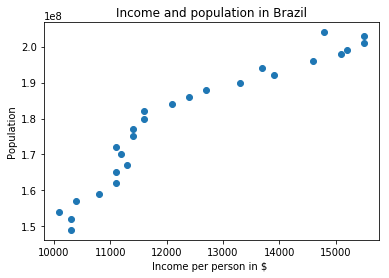

In [27]:
x= income_frame.Brazil 
y= pop_frame.Brazil
plt.scatter(x, y);
plt.xlabel('Income per person in $ ');
plt.ylabel('Population');
plt.title('Income and population in Brazil');
# it is a parlly good positive correlation between them ,more population growth rate and more individual income rate
# and there is abit swerve from the straight line 

[2 2 2 3 2 2 4 3 3 3]
[1180000000.0 1203000000.0 1226000000.0 1249000000.0 1272000000.0
 1295000000.0 1318000000.0 1341000000.0 1364000000.0 1387000000.0
 1410000000.0]


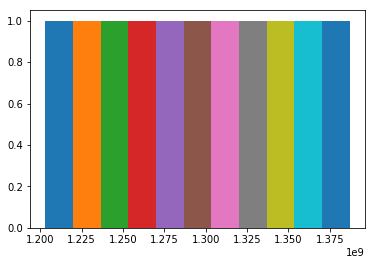

In [66]:
counts, bon =np.histogram(pop_frame.China)
#np.histogram(pop_frame.Brazil)
print(counts)
print(bon)
plt.hist(bon ,bins =1 )
plt.show()
#there is a bit Ungleichheit in population in citys in china

[3 2 2 2 2 2 3 3 3 4]
[149000000.0 154500000.0 160000000.0 165500000.0 171000000.0 176500000.0
 182000000.0 187500000.0 193000000.0 198500000.0 204000000.0]


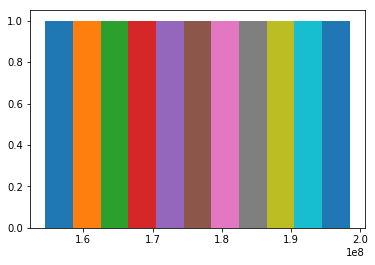

In [69]:
counts, bon =np.histogram(pop_frame.Brazil)
#np.histogram(pop_frame.Brazil)
print(counts)
print(bon)
plt.hist(bon ,bins =1 )
plt.show()
#there is a bit Ungleichheit in population in citys in brazil

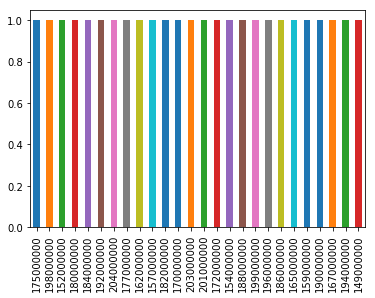

In [70]:
pop_frame.Brazil.value_counts().plot(kind='bar');
#another way to show population in brazil

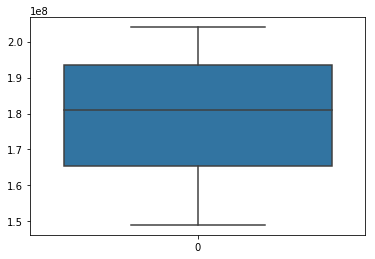

In [73]:
sb.boxplot(data = pop_frame.Brazil);
#as we sat before and showen in previous figures there is a bit Ungleichheit in population in citys in brazil
# the data are palanced

--------------------------------------------------------------------------------------
<a id='conclusions'></a>
## Conclusions
### Results:
1. The population growth rate shows a gradual increase in China as well as a stable in Brazel 
2. The forest area graph shows that China has approxmitly 70M sq. km of forest are does not derease while Brazil records decrease from 60M sq. km to 55M sq.km between 1990 and 2015.
3. The income graphs shows that individual income rate in China has seen rocketed increase in the period while Brazilian income rate was increased gradually and started decreasing in 2013.
4. China has seen postive relation between poopulation rate and forest area and income rate. 
5. Brazil has seen a positve realtion between  the population rate and income rate and anegative correlation with forest area. 


### Limitions:
1. The analysis indicates that population factor has not solety correlation with forest area.
2. The data does not provide details about people distribution and what type of their activities are influence on forest area.

In [453]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255